In [11]:
import plotly.graph_objects as go
import numpy as np

# import time
# import random
# import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from helper_functions import *


<h2>Preprocessing

In [12]:
# data_df = pd.read_csv(
#     "/home/sf_afn/Insync/sofiaa720@gmail.com/Google Drive/masters_thesis/code_v1/msc_parking/univrses/data/Kris_data_preprocessed.csv"
# )

In [13]:
data_df = pd.read_pickle("Kris_merged_yolov8.pkl")
data_df = preprocess_data(data_df)

In [14]:
# data_df.drop(columns=["Unnamed: 0"], inplace=True)
# data_df["timestamp_true"] = pd.to_datetime(data_df["timestamp_true"])
# data_df.set_index("timestamp_true", inplace=True)


In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1831 entries, 2023-06-06 20:36:00 to 2023-10-30 11:24:00
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_count           1831 non-null   int64  
 1   num_timestamp       1831 non-null   int64  
 2   month_no            1831 non-null   int32  
 3   month_name          1831 non-null   object 
 4   day                 1831 non-null   int32  
 5   day_of_week         1831 non-null   int32  
 6   day_of_week_name    1831 non-null   object 
 7   is_weekend          1831 non-null   int64  
 8   hour_of_day         1831 non-null   int32  
 9   minutes             1831 non-null   int32  
 10  min_of_day          1831 non-null   int32  
 11  week_no             1831 non-null   int32  
 12  combined            1831 non-null   object 
 13  centered_car_count  1831 non-null   float64
dtypes: float64(1), int32(7), int64(3), object(3)
memory usage: 164.5+ KB

In [16]:
# make the test train split 80:20
train_df = data_df[:350]
test_df = data_df[351:]


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2023-06-06 20:36:00 to 2023-06-18 12:10:00
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_count           350 non-null    int64  
 1   num_timestamp       350 non-null    int64  
 2   month_no            350 non-null    int32  
 3   month_name          350 non-null    object 
 4   day                 350 non-null    int32  
 5   day_of_week         350 non-null    int32  
 6   day_of_week_name    350 non-null    object 
 7   is_weekend          350 non-null    int64  
 8   hour_of_day         350 non-null    int32  
 9   minutes             350 non-null    int32  
 10  min_of_day          350 non-null    int32  
 11  week_no             350 non-null    int32  
 12  combined            350 non-null    object 
 13  centered_car_count  350 non-null    float64
dtypes: float64(1), int32(7), int64(3), object(3)
memory usage: 31.4+ KB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2023-06-19 14:33:00 to 2023-10-30 11:24:00
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_count           1480 non-null   int64  
 1   num_timestamp       1480 non-null   int64  
 2   month_no            1480 non-null   int32  
 3   month_name          1480 non-null   object 
 4   day                 1480 non-null   int32  
 5   day_of_week         1480 non-null   int32  
 6   day_of_week_name    1480 non-null   object 
 7   is_weekend          1480 non-null   int64  
 8   hour_of_day         1480 non-null   int32  
 9   minutes             1480 non-null   int32  
 10  min_of_day          1480 non-null   int32  
 11  week_no             1480 non-null   int32  
 12  combined            1480 non-null   object 
 13  centered_car_count  1480 non-null   float64
dtypes: float64(1), int32(7), int64(3), object(3)
memory usage: 133.0+ KB

In [19]:
train_df

,car_count,num_timestamp,month_no,month_name,day,day_of_week,day_of_week_name,is_weekend,hour_of_day,minutes,min_of_day,week_no,combined,centered_car_count
timestamp_true,,,,,,,,,,,,,,
2023-06-06 20:36:00,0,28101396,6,June,6,1,Tuesday,0,20,36,1236,1,06062036,-12.493719
2023-06-06 21:06:00,9,28101426,6,June,6,1,Tuesday,0,21,6,1266,1,06062106,-3.493719
2023-06-06 21:37:00,0,28101457,6,June,6,1,Tuesday,0,21,37,1297,1,06062137,-12.493719
2023-06-06 22:07:00,7,28101487,6,June,6,1,Tuesday,0,22,7,1327,1,06062207,-5.493719
2023-06-06 22:37:00,2,28101517,6,June,6,1,Tuesday,0,22,37,1357,1,06062237,-10.493719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-18 10:09:00,8,28118049,6,June,18,6,Sunday,0,10,9,609,6,06181009,-4.493719
2023-06-18 10:40:00,7,28118080,6,June,18,6,Sunday,0,10,40,640,6,06181040,-5.493719
2023-06-18 11:10:00,7,28118110,6,June,18,6,Sunday,0,11,10,670,6,06181110,-5.493719


In [20]:
data_df.head()

,car_count,num_timestamp,month_no,month_name,day,day_of_week,day_of_week_name,is_weekend,hour_of_day,minutes,min_of_day,week_no,combined,centered_car_count
timestamp_true,,,,,,,,,,,,,,
2023-06-06 20:36:00,0,28101396,6,June,6,1,Tuesday,0,20,36,1236,1,06062036,-12.493719
2023-06-06 21:06:00,9,28101426,6,June,6,1,Tuesday,0,21,6,1266,1,06062106,-3.493719
2023-06-06 21:37:00,0,28101457,6,June,6,1,Tuesday,0,21,37,1297,1,06062137,-12.493719
2023-06-06 22:07:00,7,28101487,6,June,6,1,Tuesday,0,22,7,1327,1,06062207,-5.493719
2023-06-06 22:37:00,2,28101517,6,June,6,1,Tuesday,0,22,37,1357,1,06062237,-10.493719


In [21]:
data_df.describe()


,car_count,num_timestamp,month_no,day,day_of_week,is_weekend,hour_of_day,minutes,min_of_day,week_no,centered_car_count
count,1831.000000,1.831000e+03,1831.000000,1831.000000,1831.000000,1831.0,1831.000000,1831.000000,1831.000000,1831.000000,1.831000e+03
mean,12.493719,2.821733e+07,8.368105,14.643910,2.993992,0.0,11.517750,28.824140,719.889132,2.993992,2.483601e-16
std,10.727822,7.795892e+04,1.703083,7.442451,2.085984,0.0,7.031124,17.190437,422.474324,2.085984,1.072782e+01
min,0.000000,2.810140e+07,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,-1.249372e+01
25%,4.000000,2.812826e+07,6.000000,9.000000,1.000000,0.0,5.000000,14.000000,348.500000,1.000000,-8.493719e+00
50%,10.000000,2.819876e+07,8.000000,13.000000,3.000000,0.0,12.000000,29.000000,723.000000,3.000000,-2.493719e+00
75%,18.000000,2.829316e+07,10.000000,20.000000,5.000000,0.0,18.000000,43.500000,1083.000000,5.000000,5.506281e+00
max,54.000000,2.831108e+07,10.000000,30.000000,6.000000,0.0,23.000000,59.000000,1439.000000,6.000000,4.150628e+01


In [22]:
data_df["day"].unique()


array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 24, 25, 26,  2,
        3,  4,  5, 15, 16, 21, 22, 23, 27, 28, 29, 30], dtype=int32)

In [23]:
# X = data_df["hour_of_day"].values.reshape(-1, 1)

# X_train = train_df["hour_of_day"].values.reshape(-1, 1)

# y_train = train_df["Count"].values.reshape(-1, 1)

# X_test = test_df["hour_of_day"].values.reshape(-1, 1)

# y_test = test_df["Count"].values.reshape(-1, 1)


In [26]:
day_df = data_df[["hour_of_day", "car_count"]].loc["2023-06-08"]
day_df = day_df.groupby("hour_of_day").agg("mean").reset_index()
day_df


,hour_of_day,car_count
0,0,2.5
1,1,3.0
2,2,2.0
3,3,6.5
4,4,8.0
5,5,5.5
6,6,13.0
7,7,12.5
8,8,14.0
9,9,15.0


In [27]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  23 non-null     int32  
 1   car_count    23 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 408.0 bytes


<h2>EDA

In [37]:
# Distribution of Counts:

fig = go.Figure()
fig.add_trace(go.Histogram(x=data_df["car_count"], nbinsx=40, name="car_counts"))
fig.update_layout(
    title_text="Distribution of Counts", xaxis_title="Count", yaxis_title="Frequency"
)
fig.show()

In [30]:
# Counts Over Time --> if the day of the week has any impact on the counts
fig = go.Figure()
fig.add_trace(
    go.Box(
        x=data_df["day_of_week_name"], y=data_df["car_count"], name="Counts by Day of Week"
    )
)
fig.update_layout(
    title_text="Counts by Day of Week", xaxis_title="Day of Week", yaxis_title="Count"
)
fig.show()

In [31]:
# Counts by Hour of Day
fig = go.Figure()
fig.add_trace(
    go.Box(x=data_df["hour_of_day"], y=data_df["car_count"], name="Counts by Hour of Day")
)
fig.update_layout(
    title_text="Counts by Hour of Day", xaxis_title="Hour of Day", yaxis_title="Count"
)
fig.show()

In [32]:
# Counts by Day of Month
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=data_df["day"],
        y=data_df["car_count"],
        mode="markers",
        name="Counts by Day of Month",
    )
)
fig.update_layout(
    title_text="Counts by Day of Month", xaxis_title="Day of Month", yaxis_title="Count"
)
fig.show()

In [33]:
# Counts by Day of Month
fig = go.Figure()
fig.add_trace(
    go.Box(
        x=data_df["day"],
        y=data_df["car_count"],
        name="Counts by Day of Month",
    )
)
fig.update_layout(
    title_text="Counts by Day of Month", xaxis_title="Day of Month", yaxis_title="Count"
)
fig.show()

In [34]:
trunc_data_df = data_df.drop(
    [
        "File_name",
        "Timestamp",
        "month_name",
        "day_of_week_name",
        "month_no",
        "is_weekend",
    ],
    axis=1,
)

KeyError: "['File_name', 'Timestamp'] not found in axis"

In [ ]:
trunc_data_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2023-06-06 20:36:00 to 2023-06-26 10:17:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Count          497 non-null    int64  
 1   num_timestamp  497 non-null    float64
 2   day            497 non-null    int64  
 3   day_of_week    497 non-null    int64  
 4   hour_of_day    497 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 23.3 KB


In [ ]:
# Correlation Matrix


corr = trunc_data_df.corr()


fig = go.Figure(
    data=go.Heatmap(
        z=corr,
        x=corr.columns,
        y=corr.columns,
        autocolorscale=True,
        name="Correlation matrix for data",
    )
)

fig.show()

In [ ]:
corr


,Count,num_timestamp,day,day_of_week,hour_of_day
Count,1.000000,0.280412,0.271679,-0.301491,0.175219
num_timestamp,0.280412,1.000000,0.998925,0.049052,-0.010280
day,0.271679,0.998925,1.000000,0.048962,-0.056575
day_of_week,-0.301491,0.049052,0.048962,1.000000,-0.000714
hour_of_day,0.175219,-0.010280,-0.056575,-0.000714,1.000000


In [35]:
# Trend over timestamp for Count

trace = go.Scatter(
    x=data_df["num_timestamp"], y=data_df["car_count"], mode="lines", name="Count"
)

data = [trace]


layout = go.Layout(
    title="Trend over time for Count",
    xaxis=dict(title="Timestamp"),
    yaxis=dict(title="Count"),
)


fig = go.Figure(data=data, layout=layout)


fig.show()

In [38]:
# Date trend for Count

data_df["date"] = data_df.index.date


fig = go.Figure()

fig.add_trace(
    go.Box(
        x=data_df["date"], y=data_df["car_count"], name="Count per day"
    )
)

fig.update_layout(
    title="Trend over Date for Count",
    xaxis_title="Date",
    yaxis_title="Count",
    autosize=True,
)

fig.show()

In [36]:
# Create a new column 'time_of_day' based on the 'hour_of_day' column
data_df["time_of_day"] = [
    "morning" if hour < 12 else "afternoon" if hour < 18 else "evening"
    for hour in data_df["hour_of_day"]
]

# Create box plots for each category
fig = go.Figure()

# box plot for 'morning'
fig.add_trace(
    go.Box(
        y=data_df[data_df["time_of_day"] == "morning"]["car_count"],
        name="Morning",
        marker_color="blue",
    )
)

# box plot for 'afternoon'
fig.add_trace(
    go.Box(
        y=data_df[data_df["time_of_day"] == "afternoon"]["car_count"],
        name="Afternoon",
        marker_color="orange",
    )
)

# box plot for 'evening'
fig.add_trace(
    go.Box(
        y=data_df[data_df["time_of_day"] == "evening"]["car_count"],
        name="Evening",
        marker_color="green",
    )
)

fig.update_layout(
    title="Comparison of Counts in Morning vs Afternoon vs Evening",
    yaxis_title="Count",
    # boxmode='group'  # group together boxes of the different traces for each value of x
)

fig.show()

In [ ]:
# what type of noise is in the data? --> auto correlation function
#

<h2>GPR fitting

In [ ]:
# Helper functions


def plot_gpr_samples(x, gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    # x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-3, 3])


def gpr_train(kernel, x_train, y_train, x_test):
    # Create the GPR model
    gpr = GaussianProcessRegressor(kernel=kernel)
    # Fit the GPR model to the training data
    gpr.fit(x_train, y_train)

    # Perform predictions using the trained GPR model
    y_pred, y_std = gpr.predict(x_test, return_std=True)
    # y_pred: Predicted target values
    # y_std: Standard deviation of predictions

    # Access learned model properties
    kernel_params = gpr.kernel_  # Learned kernel parameters
    # noise_level = gpr.kernel_.get_params()['k2_noise_level']  # Estimated noise level (if available)
    noise_level = gpr.alpha_  # Estimated noise level (if available)

    # Print or analyze the results as needed
    print("Predicted values:", y_pred)
    print("Prediction uncertainty (std):", y_std)
    print("Learned kernel parameters:", kernel_params)
    print("Estimated noise level:", noise_level)

    return y_pred, y_std, kernel_params, noise_level, gpr


def plot_gpr_samples_plotly(x, gpr_model, n_samples, X_train, y_train):
    # x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    fig = go.Figure()

    for idx, single_prior in enumerate(y_samples.T):
        fig.add_trace(
            go.Scatter(
                x=x, y=single_prior, mode="lines", name=f"Sampled function #{idx + 1}"
            )
        )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y_mean,
            mode="lines",
            line_color="red",
            name="Mean",
            line=dict(dash="dash"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y_mean - y_std,
            fill=None,
            mode="lines",
            line_color="rgba(255,0,0,0.1)",
            showlegend=False,
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y_mean + y_std,
            fill="tonexty",
            mode="lines",
            line_color="rgba(173, 216, 230, 0.5)",
            name=r"uncertainty",
        )
    )

    fig.add_trace(
        go.Scatter(
            x=X_train.ravel(),
            y=y_train.ravel(),
            mode="markers",
            name="Training Data",
            marker=dict(color="black"),
        )
    )

    fig.update_layout(
        xaxis_title="x",
        yaxis_title="y",
        autosize=True,
    )

    fig.show()


def plot_a_day(data_df, date: int, mode: str):
    day = f"2023-06-{date}"
    day_slice = data_df.loc[day]

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=day_slice["hour_of_day"], y=day_slice["Count"], mode=mode)
    )
    fig.update_layout(
        title=f"{day_slice['day'][1]} {day_slice['month_name'][1]}",
        xaxis_title="hour_of_day",
        yaxis_title="Count",
    )

    # Set the range of the x and y axes
    fig.update_xaxes(range=[0, 24])  # assuming hour_of_day is in the range 0-24
    fig.update_yaxes(
        range=[0, max(day_slice["Count"]) * 1.1]
    )  # set y-axis range from 0 to 10% more than the maximum count

    fig.show()


def training_data_plot(
    X_train,
    y_train,
    x_label="X_train_whole",
    y_label="y_train_whole",
    title="Training Data",
    x_lim=[0, 24],
    y_lim=[0, 50],
    figsize=(10, 7),
):
    """
    Plots the training data.

    Parameters:
    - X_train_whole: The X values of the training data.
    - y_train_whole: The y values of the training data.
    - x_label: Label for the X-axis. Default is "X_train_whole".
    - y_label: Label for the Y-axis. Default is "y_train_whole".
    - title: Title of the plot. Default is "Training Data".
    - x_lim: Range for the X-axis. Default is [0, 24].
    - y_lim: Range for the Y-axis. Default is [0, 50].
    - figsize: Size of the figure. Default is (10, 7).
    """

    plt.figure(figsize=figsize)
    plt.scatter(X_train_whole, y_train_whole, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Set the range of the x and y axes
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.grid(True)

    plt.show()

<Axes: xlabel='hour_of_day'>

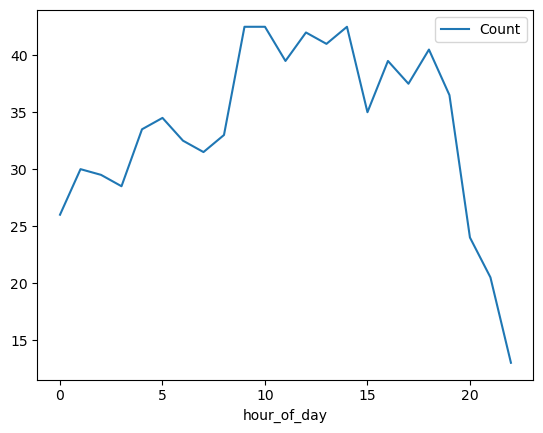

In [ ]:
day_df.plot(x="hour_of_day", y="Count")


In [ ]:
for each in data_df["day"].unique():
    plot_a_day(data_df, each, "lines+markers")


In [ ]:
hour_median_df = data_df.groupby("hour_of_day").agg({"Count": np.median}).reset_index()


In [ ]:
hour_median_df.head()

,hour_of_day,Count
0,0,34.5
1,1,31.5
2,2,30.0
3,3,29.0
4,4,27.5


In [ ]:
hour_median_df["hour_of_day"]


0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
Name: hour_of_day, dtype: int64

<H1>Hour of the day - GPR

In [ ]:
x = np.linspace(0, 23, 100)
fig = go.Figure(data=go.Scatter(x=x, y=x, mode="markers"))

fig.show()

In [ ]:
# Count agg on median for hour of day
X_train_median = hour_median_df["hour_of_day"].values.reshape(-1, 1)
y_train_median = hour_median_df["Count"].values.reshape(-1, 1)
# x, X_train_median, y_train_median

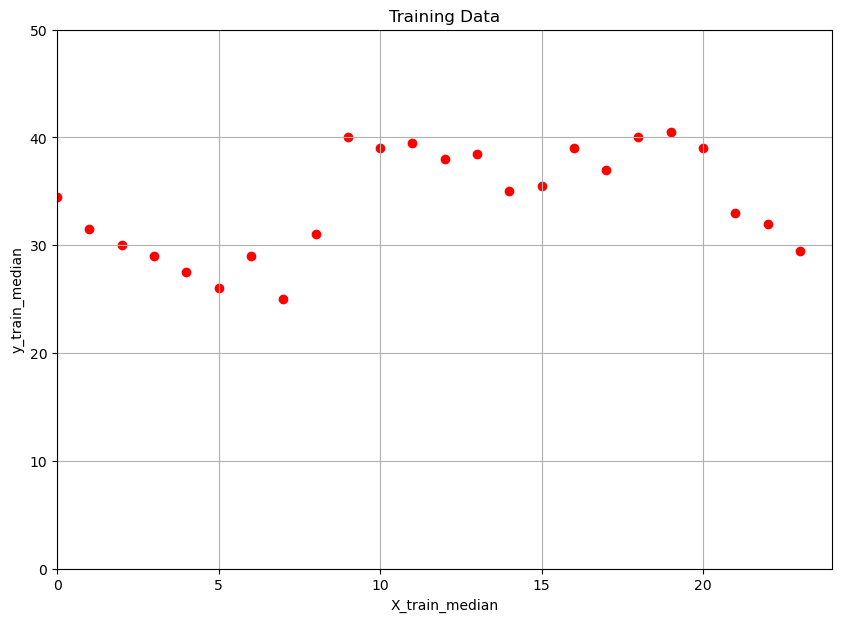

In [ ]:
training_data_plot(
    X_train_median, y_train_median, x_label="X_train_median", y_label="y_train_median"
)

In [ ]:
# Count agg by mean for hour of day
X_train_mean = day_df["hour_of_day"].values.reshape(-1, 1)
y_train_mean = day_df["Count"].values.reshape(-1, 1)
# x, X_train_mean, y_train_mean

In [ ]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
n_samples = 5


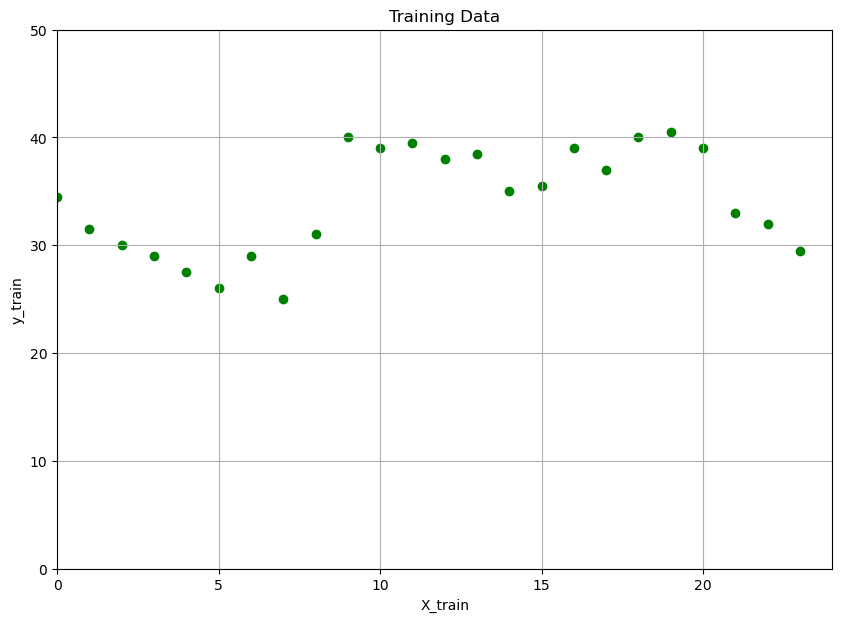

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, color="green")
plt.title("Training Data")
plt.xlabel("X_train")
plt.ylabel("y_train")

# Set the range of the x and y axes
plt.xlim([0, 24])
plt.ylim([0, 50])
plt.grid(True)

plt.show()

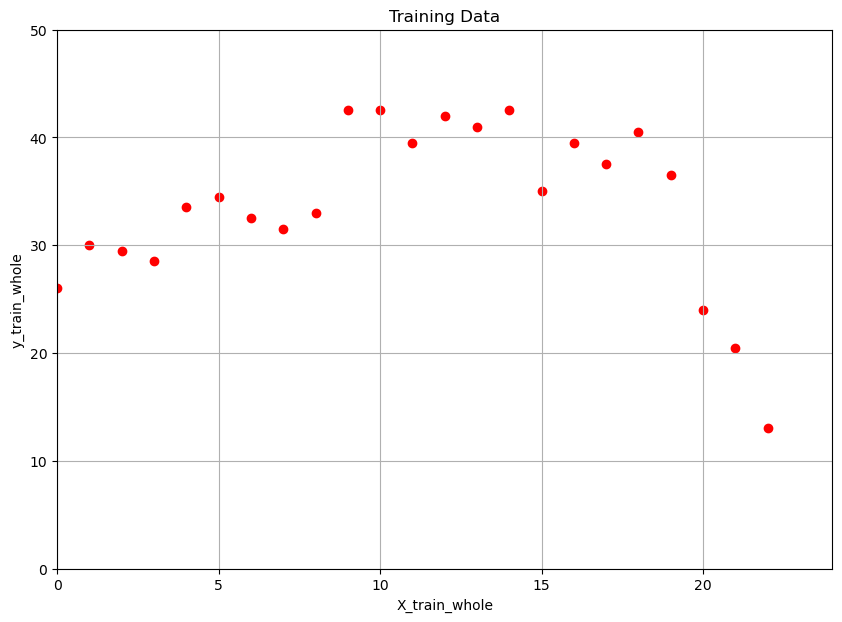

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train_whole, y_train_whole, color="red")
plt.title("Training Data")
plt.xlabel("X_train_whole")
plt.ylabel("y_train_whole")

# Set the range of the x and y axes
plt.xlim([0, 24])
plt.ylim([0, 50])
plt.grid(True)

plt.show()

In [ ]:
# gpr trained model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


def train_gpr_with_kernel(
    X_train,
    y_train,
    x,
    n_samples,
    length_scale=1.0,
    length_scale_bounds=(1e-05, 1e15),
    random_state=0,
):
    kernel = 1.0 * RBF(
        length_scale=length_scale, length_scale_bounds=length_scale_bounds
    )
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

    # plot prior
    plot_gpr_samples_plotly(x, gpr, n_samples, X_train, y_train)

    # plot posterior
    gpr.fit(X_train, y_train)
    plot_gpr_samples_plotly(x, gpr, n_samples, X_train, y_train)

    print(f"Kernel parameters before fit:\n{kernel}")
    print(
        f"Kernel parameters after fit: \n{gpr.kernel_} \n"
        f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n"
        f"Loss (NLML): {-gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
    )

    # y_mean, y_cov = gpr.predict(x.reshape(-1, 1), return_cov=True)

    # # Create a heatmap of the covariance matrix
    # heatmap = go.Heatmap(z=y_cov)
    # fig = go.Figure(data=[heatmap])
    # fig.show()

    return gpr

    y_mean:
        This represents the mean predictions of the Gaussian Process for the given input x.
        In the context of GPR, the mean prediction is the expected value of the Gaussian Process at each input point in x.
        It gives you the most likely value of the target variable y for each input value in x.

    y_cov:
        This is the covariance matrix of the predictions.
        The diagonal elements of this matrix give the variances of the predictions, which can be interpreted as the uncertainties or confidences associated with the predictions. A larger variance indicates higher uncertainty about the prediction at that point.
        The off-diagonal elements represent the covariances between predictions at different input points. This captures how the uncertainties in the predictions at different points are related to each other. In the context of GPR, this is influenced by the kernel function used, which determines how correlations between data points decay with distance.

In the provided function, the y_cov is used to create a heatmap of the covariance matrix, which visually represents the relationships and uncertainties in the predictions. This heatmap can be useful for understanding the model's confidence in its predictions and how predictions at different points are related.

However, if you're only interested in point predictions and not in the uncertainties or relationships between predictions, you might not need y_cov. On the other hand, if you want to generate confidence intervals or understand the model's uncertainty, both y_mean and y_cov are crucial.

In [ ]:
mean_gpr_rbf = train_gpr_with_kernel(
    X_train_mean,
    y_train_mean,
    x,
    n_samples=5,
    length_scale=1,
    length_scale_bounds=(1e-1, 50),
)

Kernel parameters before fit:
1**2 * RBF(length_scale=1)
Kernel parameters after fit: 
24.7**2 * RBF(length_scale=1.3) 
Log-likelihood: -90.055
Loss (NLML): 90.055


In [ ]:
median_gpr_rbf = train_gpr_with_kernel(
    X_train_median,
    y_train_median,
    x,
    n_samples=5,
    length_scale=1,
    length_scale_bounds=(1e-1, 50),
)

Kernel parameters before fit:
1**2 * RBF(length_scale=1)
Kernel parameters after fit: 
25**2 * RBF(length_scale=1.43) 
Log-likelihood: -89.031
Loss (NLML): 89.031


In [ ]:
X_new = np.array([[12], [22]])
y_pred = gpr.predict(X_new)
for i, val in enumerate(y_pred):
    print(f"Prediction for input {X_new[i]}: {val}")


Prediction for input [12]: 38.000000000041666
Prediction for input [22]: 31.999999999969646


In [ ]:
from sklearn.gaussian_process.kernels import RationalQuadratic

kernel = 1.0 * RationalQuadratic(length_scale=1, alpha=0.5, alpha_bounds=(1e-05, 1e15))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)


# plot prior
plot_gpr_samples_plotly(x, gpr, n_samples, X_train_mean, y_train_mean)


# plot posterior
gpr.fit(X_train_mean, y_train_mean)
plot_gpr_samples_plotly(x, gpr, n_samples, X_train_mean, y_train_mean)


print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

y_mean, y_cov = gpr.predict(x.reshape(-1, 1), return_cov=True)

# Create a heatmap of the covariance matrix
heatmap = go.Heatmap(z=y_cov)
fig = go.Figure(data=[heatmap])
fig.show()

Kernel parameters before fit:
1**2 * RationalQuadratic(alpha=0.5, length_scale=1))
Kernel parameters after fit: 
30.6**2 * RationalQuadratic(alpha=0.0176, length_scale=4.88) 
Log-likelihood: -70.990


<h2>GPR on whole set

In [ ]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2023-06-06 20:36:00 to 2023-06-26 10:17:00
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   File_name         497 non-null    object 
 1   Count             497 non-null    int64  
 2   Timestamp         497 non-null    object 
 3   num_timestamp     497 non-null    float64
 4   month_no          497 non-null    int64  
 5   month_name        497 non-null    object 
 6   day               497 non-null    int64  
 7   day_of_week       497 non-null    int64  
 8   day_of_week_name  497 non-null    object 
 9   is_weekend        497 non-null    int64  
 10  hour_of_day       497 non-null    int64  
 11  date              497 non-null    object 
 12  time_of_day       497 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 54.4+ KB


In [ ]:
data_df.index.unique()


DatetimeIndex(['2023-06-06 20:36:00', '2023-06-06 21:06:00',
               '2023-06-06 21:37:00', '2023-06-06 22:07:00',
               '2023-06-06 22:37:00', '2023-06-06 23:07:00',
               '2023-06-06 23:38:00', '2023-06-07 00:08:00',
               '2023-06-07 00:38:00', '2023-06-07 01:08:00',
               ...
               '2023-06-26 05:30:00', '2023-06-26 05:57:00',
               '2023-06-26 06:56:00', '2023-06-26 07:40:00',
               '2023-06-26 07:47:00', '2023-06-26 07:52:00',
               '2023-06-26 08:17:00', '2023-06-26 09:13:00',
               '2023-06-26 10:07:00', '2023-06-26 10:17:00'],
              dtype='datetime64[ns]', name='timestamp_true', length=497, freq=None)

In [ ]:
data_df.duplicated().sum()


0

In [ ]:
import plotly.graph_objects as go

# Assuming df is your DataFrame and it has columns 'timestamp' and 'count'
fig = go.Figure(data=go.Scatter(x=data_df["Timestamp"], y=data_df["Count"]))

# Set title and labels
fig.update_layout(
    title="Count over Time",
    xaxis_title="Timestamp",
    yaxis_title="Count",
)

fig.show()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared

n_samples = 5
# gpr with periodic kernel
kernel = 1.0 * ExpSineSquared(
    length_scale=5,
    periodicity=5,
    length_scale_bounds=(1e-1, 50),
    periodicity_bounds=(1e-1, 100),
)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# plot prior
plot_gpr_samples_plotly(x, gpr, n_samples, X_train_mean, y_train_mean)

# plot posterior
gpr.fit(X_train_mean, y_train_mean)
plot_gpr_samples_plotly(x, gpr, n_samples, X_train_mean, y_train_mean)

print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

y_mean, y_cov = gpr.predict(x.reshape(-1, 1), return_cov=True)

# Create a heatmap of the covariance matrix
# heatmap = go.Heatmap(z=y_cov)
# fig = go.Figure(data=[heatmap])
# fig.show()

Kernel parameters before fit:
1**2 * ExpSineSquared(length_scale=5, periodicity=5))
Kernel parameters after fit: 
27.9**2 * ExpSineSquared(length_scale=0.216, periodicity=4.1) 
Log-likelihood: -95.585
